Assignment 3, Tutorial 2: Logistic Regression

Joshua Butler 100155237

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length 23873 bytes


In [3]:
dataset = pd.read_csv('diabetes.csv')

In [40]:
x = dataset.iloc[:,[1,5]].values
y = dataset.iloc[:, 8].values

In [42]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.25, random_state=0)

In [43]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])

[[-1.01521454 -1.22070104]
 [-0.09964691  0.13719053]
 [-0.95207195  0.0240329 ]
 [ 0.59492164  0.87900167]
 [ 0.75277813  0.71555175]
 [ 1.03691981  0.07432518]
 [-0.60478767 -0.89380122]
 [-0.69950156  0.401225  ]
 [-0.32064599 -1.03210499]
 [ 0.56335034 -1.27099332]]


In [44]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [45]:
y_pred = classifier.predict(xtest)

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[116  14]
 [ 29  33]]


In [47]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(ytest, y_pred))


Accuracy :  0.7760416666666666


<ipython-input-51-a598bada15a7>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


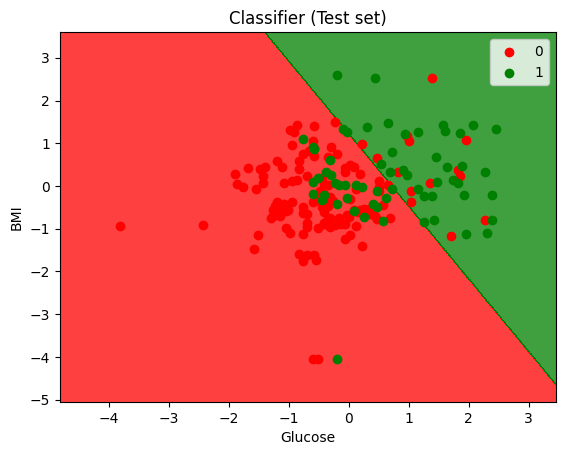

In [51]:

from matplotlib.colors import ListedColormap

X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Classifier (Test set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()